# Import libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Data preprocessing

## Load dataset

In [3]:
digits = datasets.load_digits()

## Explore

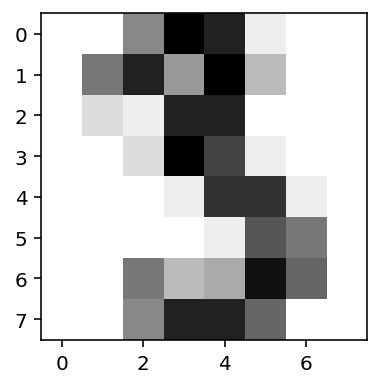

In [14]:
def Explore_A():
    _, axes = plt.subplots(2, 4)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Training: %i' % label)

def Explore_B():
    plt.figure(1, figsize=(3,3))
    plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')

# Explore_A()
Explore_B()

## Transform dataset

In [15]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Modeling

## Create method

In [19]:
def Create_method_A():
    classifier = svm.SVC(gamma=0.001)
    return classifier

def Create_method_B():
    classifier = svm.SVC(gamma=0.001, kernel = 'linear')
    return classifier

# classifier = Create_method_A()
classifier = Create_method_B()

## Split dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)


## Train model

In [21]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

## Get predictions

In [22]:
predicted = classifier.predict(X_test)

In [23]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier SVC(gamma=0.001, kernel='linear'):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899


Confusion matrix:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 82  0  0  0  0  0  0  3  6]
 [ 1  0 85  0  0  0  0  0  0  0]
 [ 0  0  0 78  0  4  0  1  8  0]
 [ 1  0  0  0 87  

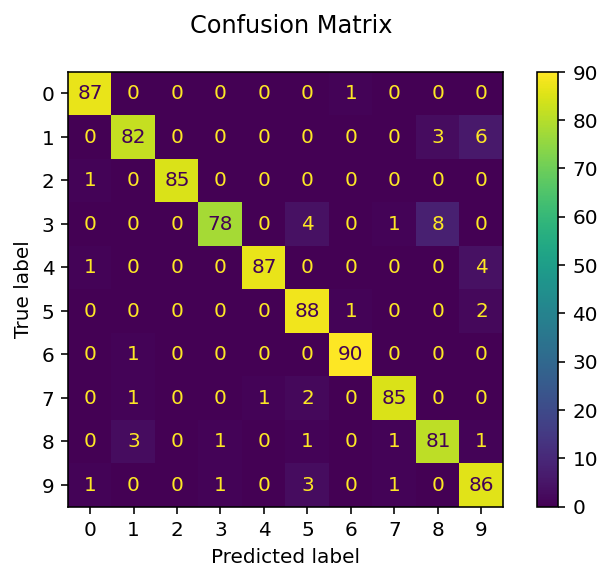

In [24]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
